In [2]:
import yfinance as yf
import pandas as pd

In [46]:
df = pd.read_csv('ncc_stock.csv')

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5602,2024-08-26,687.260010,690.590027,681.640015,688.440002,688.440002,1354200
5603,2024-08-27,688.530029,707.890015,686.919983,695.719971,695.719971,3164900
5604,2024-08-28,695.830017,696.669983,677.099976,683.840027,683.840027,2430600
5605,2024-08-29,690.000000,699.799988,686.070007,692.479980,692.479980,2187000


In [21]:

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2342 non-null   datetime64[ns]
 1   Open       2342 non-null   float64       
 2   High       2342 non-null   float64       
 3   Low        2342 non-null   float64       
 4   Close      2342 non-null   float64       
 5   Adj Close  2342 non-null   float64       
 6   Volume     2342 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 128.2 KB


In [22]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-03,2.760,2.760,2.760,2.76,2.76,2767
1,2012-05-04,0.806,0.806,0.799,0.80,0.80,0
2,2012-05-07,2.760,2.760,2.760,2.76,2.76,2767
3,2012-05-08,2.760,2.760,2.760,2.76,2.76,2767
4,2012-05-09,2.760,2.760,2.760,2.76,2.76,2767
...,...,...,...,...,...,...,...
2337,2022-02-24,2.150,2.150,2.150,2.15,2.15,0
2338,2022-02-25,2.150,2.150,2.150,2.15,2.15,0
2339,2022-02-28,2.150,2.150,2.150,2.15,2.15,0
2340,2022-03-01,2.150,2.150,2.150,2.15,2.15,0


In [24]:
# Creating a dataframe with all the dates in a calender year since the stock was launched

df_dc = pd.DataFrame(pd.date_range('2012-05-03','2022-03-02'),columns=['Date_Created'])
df_dc.head()

,Date_Created
0,2012-05-03
1,2012-05-04
2,2012-05-05
3,2012-05-06
4,2012-05-07


Data Integration

In [25]:
# Left join with all the dates in calender year since the stock was launched
df_bi = df_dc.merge(df,how='left' ,left_on = 'Date_Created', right_on = 'Date')
df_bi

,Date_Created,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-03,2012-05-03,2.760,2.760,2.760,2.76,2.76,2767.0
1,2012-05-04,2012-05-04,0.806,0.806,0.799,0.80,0.80,0.0
2,2012-05-05,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-05-06,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-05-07,2012-05-07,2.760,2.760,2.760,2.76,2.76,2767.0
...,...,...,...,...,...,...,...,...
3586,2022-02-26,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3587,2022-02-27,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3588,2022-02-28,2022-02-28,2.150,2.150,2.150,2.15,2.15,0.0
3589,2022-03-01,2022-03-01,2.150,2.150,2.150,2.15,2.15,0.0


In [26]:
# getting only date and adj stock
df_bi = df_bi.loc[:,['Date_Created','Adj Close']]
df_bi.head()

,Date_Created,Adj Close
0,2012-05-03,2.76
1,2012-05-04,0.80
2,2012-05-05,NaN
3,2012-05-06,NaN
4,2012-05-07,2.76


In [31]:
# filling na value with linear interpolation
df_bi['Adj Close'] = df_bi['Adj Close'].interpolate(method = 'linear')
df_bi.head()

,Date_Created,Adj Close,Date_mod
0,2012-05-03,2.760000,05 - 03
1,2012-05-04,0.800000,05 - 04
2,2012-05-05,1.453333,05 - 05
3,2012-05-06,2.106667,05 - 06
4,2012-05-07,2.760000,05 - 07


In [32]:
# getting a column with only month and day
df_bi['Date_mod'] = df_bi['Date_Created'].dt.strftime('%m - %d')
df_bi

,Date_Created,Adj Close,Date_mod
0,2012-05-03,2.760000,05 - 03
1,2012-05-04,0.800000,05 - 04
2,2012-05-05,1.453333,05 - 05
3,2012-05-06,2.106667,05 - 06
4,2012-05-07,2.760000,05 - 07
...,...,...,...
3586,2022-02-26,2.150000,02 - 26
3587,2022-02-27,2.150000,02 - 27
3588,2022-02-28,2.150000,02 - 28
3589,2022-03-01,2.150000,03 - 01


In [34]:
df_new = df_bi.groupby('Date_mod').mean('Adj Close')
df_new

,Adj Close
Date_mod,
01 - 01,2.712675
01 - 02,2.622725
01 - 03,2.447650
01 - 04,2.406967
01 - 05,2.633067
...,...
12 - 27,2.431067
12 - 28,2.359467
12 - 29,2.592700


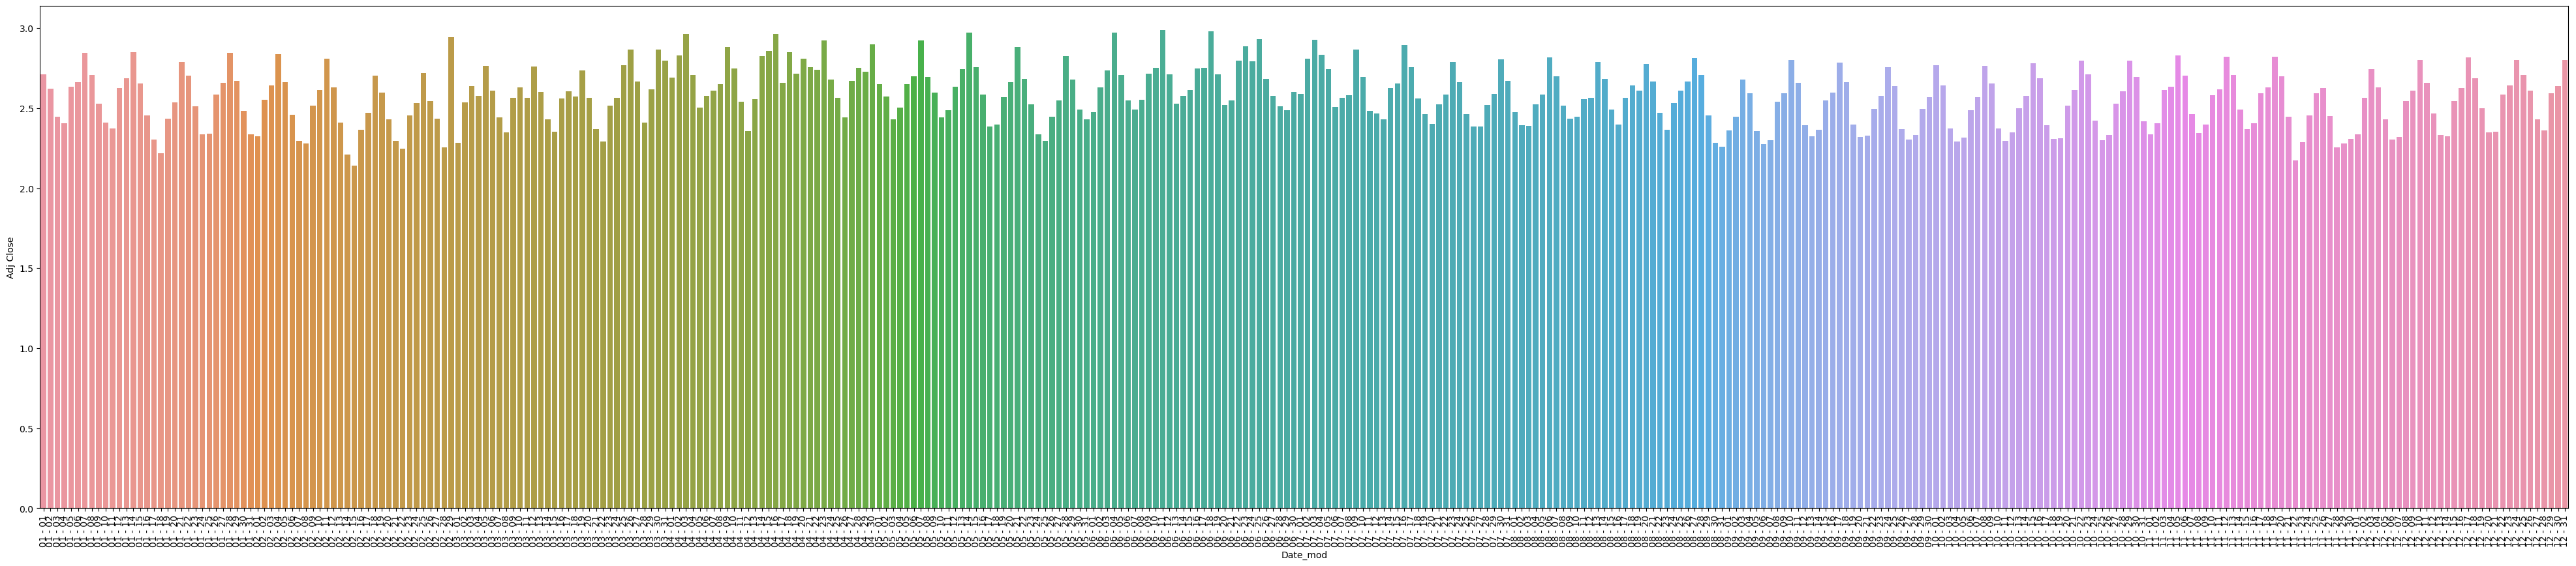

In [42]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize  =(50,10))
sb.barplot(y=df_new['Adj Close'],x=df_new.index)
plt.xticks(rotation=90)
plt.show()

<Axes: >

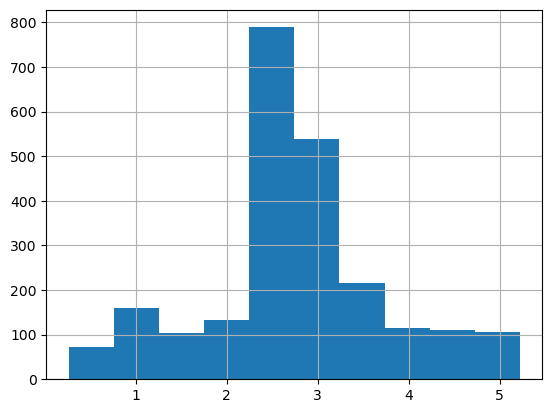

In [43]:
df.Close.hist(bins=10)

<Axes: ylabel='Adj Close'>

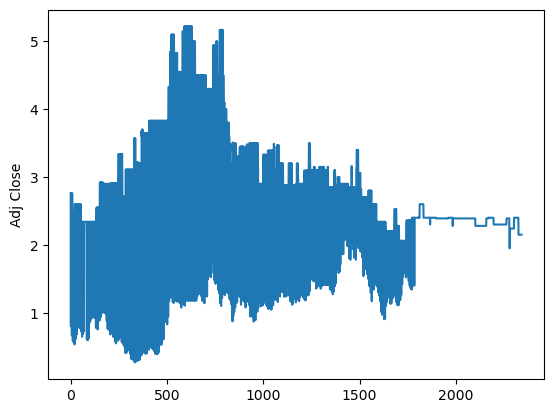

In [50]:
sb.lineplot(y=df['Adj Close'],x=df.index)